
Set up the model/mathematical program and specify the algorithms that you want to try to solve the problems.
You can work in groups of two. I want at least 2 groups for each of the problems below.

The student-course Assignment problem:    

**- Input:**   

Students and their course preferences

**- Output:** 

Student assignment to optimize the total satisfaction 

## CHOSEN ALGORITHMS:

a) Hungarian algorithm  
b) Auction algorithm

### a) Hungarian algorithm
Using SciPy library, which includes the linear_sum_assignment function for the Hungarian method implementation

### DATASET DEFINITION

In the made up datasets, there will be more courses than students in order to avoid any student not being assigned any course

In [272]:
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment
import time

# defining the paths
path_10 = 'https://raw.githubusercontent.com/ferriitoo/csv/main/student_preferences_10.txt'
path_20 = 'https://raw.githubusercontent.com/ferriitoo/csv/main/student_preferences_20.txt'
path_50 = 'https://raw.githubusercontent.com/ferriitoo/csv/main/student_preferences_50.txt'
path_100 = 'https://raw.githubusercontent.com/ferriitoo/csv/main/student_preferences_100.txt'

datasets = {
    '10_rows': path_10,
    '20_rows': path_20,
    '50_rows': path_50,
    '100_rows': path_100,
}

### CODING IMPLEMENTATION

In [273]:
# Initialize a list for running times
running_times = []

# Define the number of runs
n = 1000

for name, path in datasets.items():
    # Read input data
    data = pd.read_csv(path)

    # Initialize the running time for the current dataset
    running_time_sum = 0

    # Run the algorithm n times
    for _ in range(n):
        # Measure the running time of the linear_sum_assignment algorithm
        start_time = time.time()
        student_indices, course_indices = linear_sum_assignment(cost_matrix)

        # Process data to create a matrix of students, courses, and satisfaction scores
        student_ids = data["student_id"].unique()
        course_ids = data["course_id"].unique()

        preference_matrix = np.full((len(student_ids), len(course_ids)), -1)

        for _, row in data.iterrows():
            student_index = np.where(student_ids == row["student_id"])[0][0]
            course_index = np.where(course_ids == row["course_id"])[0][0]
            preference_matrix[student_index, course_index] = row["satisfaction_score"]

        # Convert the satisfaction scores to costs by negating them
        cost_matrix = -preference_matrix
        
        student_indices, course_indices = linear_sum_assignment(cost_matrix)

        end_time = time.time()

        # Calculate the running time in milliseconds
        running_time = (end_time - start_time) * 1000
        running_time_sum += running_time

    # Calculate the average running time for the current dataset
    avg_running_time = running_time_sum / n
    running_times.append(avg_running_time)

    # ... (Same printing as before)
     # Print the optimal assignment, individual satisfaction, and total satisfaction
    total_satisfaction = 0
    num_students = len(student_ids)
    print(f'{name} dataset')
    print("Optimal Assignment and Individual Satisfaction:")
    print('\n')
    
    satisfaction_list = []
    for student_index, course_index in zip(student_indices, course_indices):
        satisfaction = preference_matrix[student_index, course_index]
        satisfaction_list.append(satisfaction)
        total_satisfaction += satisfaction
        print(f"Student {student_ids[student_index]} is assigned to course {course_ids[course_index]} with satisfaction {satisfaction}")
    
    average_satisfaction = total_satisfaction / num_students
    print(f"\nTotal satisfaction: {total_satisfaction}")
    print(f"Number of students: {num_students}")
    print(f"Average satisfaction per student: {average_satisfaction}")
    print('\n' + '-' * 50 + '\n')

# Print the average running times for each dataset
print("Average running times for each dataset:")
for name, running_time in zip(datasets.keys(), running_times):
    print(f"{name}: {running_time:.2f} ms")

hungarian_running_times = running_times

10_rows dataset
Optimal Assignment and Individual Satisfaction:


Student 1 is assigned to course A with satisfaction 85
Student 2 is assigned to course F with satisfaction 95
Student 3 is assigned to course I with satisfaction 80

Total satisfaction: 260
Number of students: 3
Average satisfaction per student: 86.66666666666667

--------------------------------------------------

20_rows dataset
Optimal Assignment and Individual Satisfaction:


Student 1 is assigned to course A with satisfaction 85
Student 2 is assigned to course F with satisfaction 95
Student 3 is assigned to course J with satisfaction 80
Student 4 is assigned to course B with satisfaction 70
Student 5 is assigned to course G with satisfaction 75
Student 6 is assigned to course I with satisfaction 90

Total satisfaction: 495
Number of students: 6
Average satisfaction per student: 82.5

--------------------------------------------------

50_rows dataset
Optimal Assignment and Individual Satisfaction:


Student 1 is ass

### COMPLEXITY

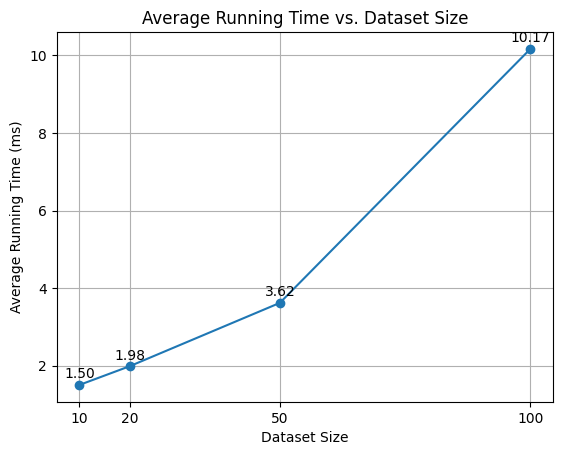

In [274]:
import matplotlib.pyplot as plt

# Dataset sizes
x_axis = [10, 20, 50, 100]

# Plot the graph
plt.plot(x_axis, running_times, marker='o')
plt.xlabel("Dataset Size")
plt.ylabel("Average Running Time (ms)")
plt.title("Average Running Time vs. Dataset Size")
plt.xticks(x_axis)
plt.grid()

# Annotate the points
for i, txt in enumerate(running_times):
    plt.annotate(f"{txt:.2f}", (x_axis[i], running_times[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Show the plot
plt.show()

### SATISFACTION

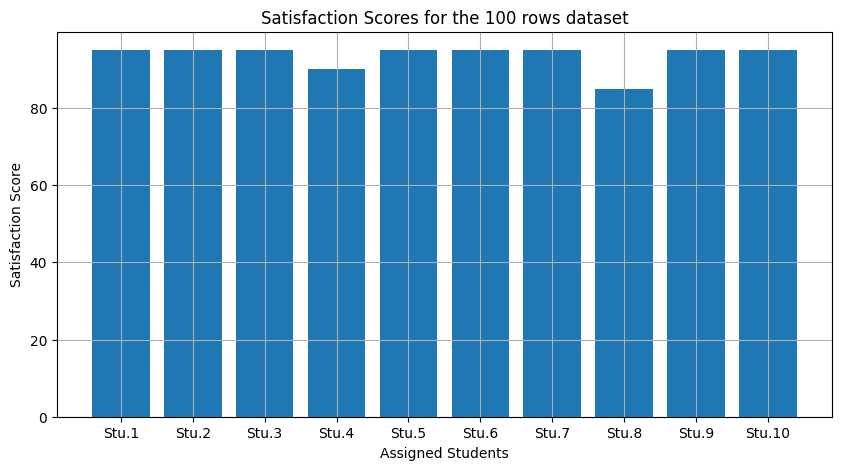

In [275]:
import matplotlib.pyplot as plt

# Dataset sizes
x_axis = range(len(satisfaction_list))

# Make the figure wider
fig = plt.gcf()
fig.set_size_inches(10, 5)

# Plot the graph
plt.bar(x_axis, satisfaction_list)
plt.xlabel("Assigned Students")
plt.ylabel("Satisfaction Score")
plt.title("Satisfaction Scores for the 100 rows dataset")
list = [f"Stu.{i+1}" for i in x_axis]
plt.xticks(x_axis, list)
plt.grid()

# Show the plot
plt.show()




### CORRECTNESS

### b) Auction algorithm  
Using numpy and pandas for the home made Hungarian method implementation

### DATASET DEFINITION

In [276]:
import pandas as pd
import numpy as np
import time

# defining the paths
path_20 = 'https://raw.githubusercontent.com/ferriitoo/csv/main/auction_dataset_20.txt'
path_100 = 'https://raw.githubusercontent.com/ferriitoo/csv/main/auction_dataset_100.txt'

datasets = {
    '20_rows': path_20,
    '100_rows': path_100,
}

### CODING IMPLEMENTATION

In [277]:
n = 1000  # number of simulations
dif = 4  # number of students in the datasets

avg_times = []

for name, path in datasets.items():
    
    # Read the input data
    data = pd.read_csv(path)

    # Get the unique student and course IDs
    student_ids = data["student_id"].unique()
    course_ids = data["course_id"].unique()

    # Initialize the prices and assignments matrices
    prices = np.zeros((len(course_ids),))
    assignments = np.full((len(student_ids),), -1)

    # Initialize a list to store the running times
    running_times = []
    
    # Run the auction algorithm n times
    for i in range(n):

        # Reset the prices and assignments matrices for each iteration
        prices = np.zeros((len(course_ids),))
        assignments = np.full((len(student_ids),), -1)

        # Measure the runtime of the algorithm
        start_time = time.time()

        # Run the auction algorithm
        for i in range(len(student_ids)):
            # Get the preferences of the current student
            student_pref = data.loc[data["student_id"] == student_ids[i]]

            # Calculate the bids for each course
            bids = student_pref["satisfaction_score"].values - prices[student_pref["course_id"].values - 1]

            # Assign the student to the course with the highest bid
            max_bid_index = np.argmax(bids)
            max_bid_course = student_pref.iloc[max_bid_index]["course_id"]
            assignments[i] = max_bid_course
            prices[max_bid_course - 1] += bids[max_bid_index]

        # Measure the total running time for this iteration
        end_time = time.time()
        running_time = end_time - start_time

        # Add the running time to the list
        running_times.append(running_time)

    # Print the assignments and the total satisfaction
    total_satisfaction = 0
    satisfaction_list = []
    
    for i in range(len(student_ids)):
        student_id = student_ids[i]
        course_id = assignments[i]
        satisfaction = data.loc[(data["student_id"] == student_id) & (data["course_id"] == course_id)]["satisfaction_score"].values[0]
        total_satisfaction += satisfaction
        satisfaction_list.append(satisfaction)
        print(f"{name} - Student {student_id} is assigned to course {course_id} with satisfaction {satisfaction}")

    # Calculate and print the average running time
    avg_running_time = round(sum(running_times) / n * 1000, 2)
    avg_times.append(avg_running_time)
    print('\n')
    print(f"{name} - Average running time: {avg_running_time} miliseconds")
    print(f"{name} - Total satisfaction: {total_satisfaction}")
    print(f"{name} - Average satisfaction per student: {total_satisfaction / dif}\n")

    dif = 10 if name == '100_rows' else 4  # update the number of students in the datasets for the next iteration


20_rows - Student 1 is assigned to course 1 with satisfaction 9
20_rows - Student 2 is assigned to course 2 with satisfaction 9
20_rows - Student 3 is assigned to course 4 with satisfaction 9
20_rows - Student 4 is assigned to course 3 with satisfaction 9


20_rows - Average running time: 2.83 miliseconds
20_rows - Total satisfaction: 36
20_rows - Average satisfaction per student: 9.0

100_rows - Student 1 is assigned to course 10 with satisfaction 10
100_rows - Student 2 is assigned to course 4 with satisfaction 10
100_rows - Student 3 is assigned to course 6 with satisfaction 10
100_rows - Student 4 is assigned to course 5 with satisfaction 10
100_rows - Student 5 is assigned to course 7 with satisfaction 9
100_rows - Student 6 is assigned to course 2 with satisfaction 9
100_rows - Student 7 is assigned to course 8 with satisfaction 10
100_rows - Student 8 is assigned to course 1 with satisfaction 10
100_rows - Student 9 is assigned to course 9 with satisfaction 9
100_rows - Student 

### COMPLEXITY

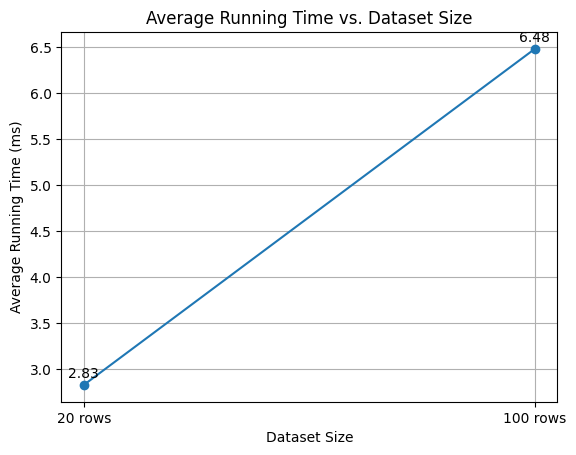

In [278]:
# Plot the graph
x_axis = ['20 rows', '100 rows']
plt.plot(x_axis, avg_times, marker='o')
plt.xlabel("Dataset Size")
plt.ylabel("Average Running Time (ms)")
plt.title("Average Running Time vs. Dataset Size")
plt.xticks(x_axis)
plt.grid()

# Annotate the points
for i, txt in enumerate(avg_times):
    plt.annotate(f"{txt:.2f}", (x_axis[i], avg_times[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Show the plot
plt.show()

### SATISFACTION

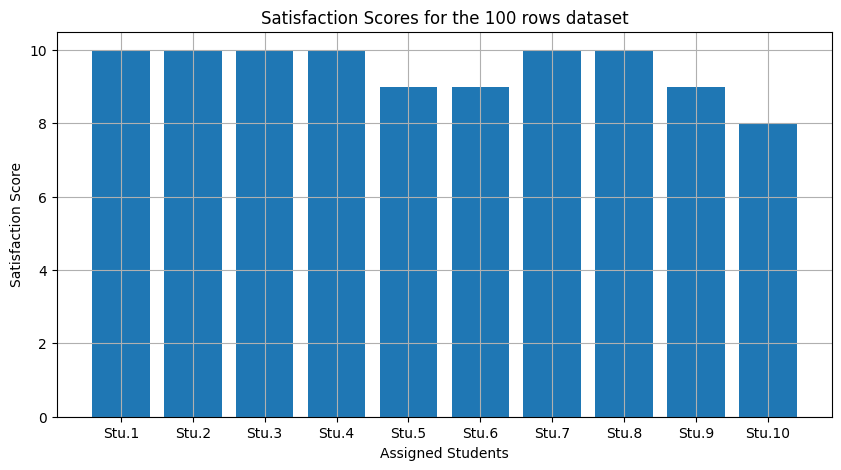

In [279]:
import matplotlib.pyplot as plt

# Dataset sizes
x_axis = range(len(satisfaction_list))

# Make the figure wider
fig = plt.gcf()
fig.set_size_inches(10, 5)

# Plot the graph
plt.bar(x_axis, satisfaction_list)
plt.xlabel("Assigned Students")
plt.ylabel("Satisfaction Score")
plt.title("Satisfaction Scores for the 100 rows dataset")
list = [f"Stu.{i+1}" for i in x_axis]
plt.xticks(x_axis, list)
plt.grid()

# Show the plot
plt.show()

### CORRECTNESS

### COMPARATION BETWEEN THE TWO ALGORITHMS

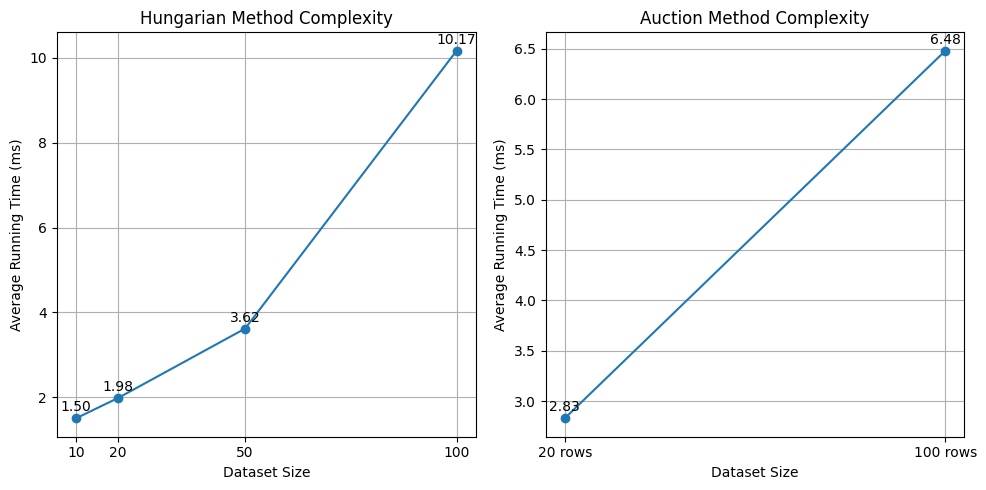

In [280]:
import matplotlib.pyplot as plt

# Data for Hungarian method complexity
x_hungarian = [10, 20, 50, 100]
y_hungarian = hungarian_running_times

# Data for auction method complexity
x_auction = ['20 rows', '100 rows']
y_auction = avg_times

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Hungarian method complexity
ax1.plot(x_hungarian, y_hungarian, marker='o')
ax1.set_xlabel("Dataset Size")
ax1.set_ylabel("Average Running Time (ms)")
ax1.set_title("Hungarian Method Complexity")
ax1.set_xticks(x_hungarian)
ax1.grid()

# Annotate the points
for i, txt in enumerate(y_hungarian):
    ax1.annotate(f"{txt:.2f}", (x_hungarian[i], y_hungarian[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot for auction method complexity
ax2.plot(x_auction, y_auction, marker='o')
ax2.set_xlabel("Dataset Size")
ax2.set_ylabel("Average Running Time (ms)")
ax2.set_title("Auction Method Complexity")
ax2.set_xticks(x_auction)
ax2.grid()

# Annotate the points
for i, txt in enumerate(y_auction):
    ax2.annotate(f"{txt:.2f}", (x_auction[i], y_auction[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Both algorithms have a polynomial average and worst case time complexity. The Hungarian Method has a worst-case time complexity of O(n^3), where n is the number of rows/columns in the input matrix, making it efficient for small to medium-sized datasets. However, its complexity increases significantly for larger datasets, which can make it impractical.

On the other hand, the Auction method has a worst-case time complexity of O(n^2 * log n), where n is the number of students/courses. This method can handle larger datasets more efficiently than the Hungarian Method, but it may still be slower than other algorithms for very large datasets.

In terms of performance, the Auction method can be faster than the Hungarian Method for larger datasets due to its lower worst-case time complexity. However, the performance of both methods can depend on the specific characteristics of the dataset and the implementation.

For the 20 row dataset, both algorithms have almost the same runtime. Nevertheless, for the 100 row dataset, the Auction method seems to have a smaller runtime. Anyway, both algorithms seem to have a polinomial complexity as we saw in theory. 

Additionally, it seems that for small datasets, the Hungarian algorithm's complexity could be something close to a linear complexity. About the Auction method we cannot assure the same due to the fact that we have only taken two samples (20 roows and 100 rows).

Finally, it must pointed out that run time measurements have been taken with the TIME library package. That is to say, we have made some assumptions when trying to work out the running time of algorith, such as, that the computer fixed costs for each operations are the same, that unusual events have happened equally in each simulation and so on. In order to avoud this, each runtime has been calculated by performing the average over n = 1000 sample experiments. This way, anomalies or outliers importance in the metric have been removed.